In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
!pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
df = pd.read_csv("data_participant.csv")

In [ ]:
# Change boolean value of voyage_annule to either 1 or 0
# Change values of periode horaire to range(1,6)
# FdS (Fin de semaine)
# PPAM (Periode de pointe du matin, 6h a 8h59)
# PPPM (Periode de pointe de l'aprem, 15h a 17h59)
# PHPS (Periode hors pointe du soir, 18h a 5h59)
# PHPJ (Periode hors pointe du jour, 9h a 14h59)

df = df.replace({'FdS': 4, 'PPAM': 2, 'PPPM': 3, 'PHPS': 5, 'PHPJ': 1})
df = df.replace({True: 1, False: 0})

In [ ]:
df.head()

,id,date,secteur,ligne,voyage,direction,periode_horaire,est_ferie,jour_semaine,categorie_jour,voyage_annule,montants_capteur
0,2,2022-01-01,0,0,1,0,4,1,5,4,0,4.0
1,3,2022-01-01,0,0,2,0,4,1,5,4,0,3.0
2,4,2022-01-01,0,0,3,0,4,1,5,4,0,2.0
3,5,2022-01-01,0,0,4,0,4,1,5,4,0,2.0
4,7,2022-01-01,0,0,6,0,4,1,5,4,0,6.0


In [ ]:
filled_df = df.fillna(-1)
df = df.dropna()

In [ ]:
filled_df = filled_df[filled_df["montants_capteur"] == -1.0]
filled_df

,id,date,secteur,ligne,voyage,direction,periode_horaire,est_ferie,jour_semaine,categorie_jour,voyage_annule,montants_capteur
1625820,2103375,2023-05-08,2,8,33,0,3,0,0,1,0,-1.0
1625821,2103376,2023-05-08,2,8,9,1,3,0,0,1,0,-1.0
1625822,2103377,2023-05-08,2,8,34,0,3,0,0,1,0,-1.0
1625823,2103378,2023-05-08,2,8,10,1,3,0,0,1,0,-1.0
1625824,2103379,2023-05-08,2,8,11,1,2,0,0,1,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2032271,2621166,2023-09-06,11,21,18,1,1,0,2,2,0,-1.0
2032272,2621167,2023-09-06,11,21,30,1,1,0,2,2,0,-1.0
2032273,2621168,2023-09-06,11,21,19,1,1,0,2,2,0,-1.0
2032274,2621169,2023-09-06,11,21,31,1,1,0,2,2,0,-1.0


In [ ]:
ids = filled_df['id'].values

In [ ]:
df = df.drop(['id', 'date', 'voyage_annule'], axis=1)
filled_df = filled_df.drop(['id', 'date', 'voyage_annule'], axis=1)

In [ ]:
df

,secteur,ligne,voyage,direction,periode_horaire,est_ferie,jour_semaine,categorie_jour,montants_capteur
0,0,0,1,0,4,1,5,4,4.0
1,0,0,2,0,4,1,5,4,3.0
2,0,0,3,0,4,1,5,4,2.0
3,0,0,4,0,4,1,5,4,2.0
4,0,0,6,0,4,1,5,4,6.0
...,...,...,...,...,...,...,...,...,...
1625815,2,8,6,1,1,0,0,1,9.0
1625816,2,8,28,0,1,0,0,1,5.0
1625817,2,8,7,1,1,0,0,1,5.0
1625818,2,8,32,0,1,0,0,1,9.0


# Train/valid/test datasets

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels):
  dataframe = copy.deepcopy(dataframe)
  X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
_, X_train_all, y_train_all = get_xy(train, "montants_capteur", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "montants_capteur", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "montants_capteur", x_labels=df.columns[:-1])
_, X_missing_all, y_missing_all = get_xy(filled_df, "montants_capteur", x_labels=df.columns[:-1])

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(8,), axis=-1)
all_normalizer.adapt(X_train_all)

# Tuner

In [ ]:
# Run tuner to find optimal paramters, then hardcode into model!!!! :)
"""
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(all_normalizer)

  hp_units = hp.Int('units', min_value=16, max_value=64, step=8)

  model.add(tf.keras.layers.Dense(
      units=hp_units,
      activation='sigmoid'))

  model.add(tf.keras.layers.Dense(
      units=hp_units,
      activation='sigmoid'))

  model.add(tf.keras.layers.Dense(
      units=hp_units,
      activation='sigmoid'))

  model.add(tf.keras.layers.Dense(1))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mean_squared_error',)

  return model

tuner = kt.RandomSearch(
  build_model,
  objective='val_loss',
  max_trials=5)

tuner.search(X_train_all, y_train_all, epochs=5, validation_data=(X_val_all, y_val_all))
best_model = tuner.get_best_models()[0]
"""

# Model

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    batch_size=128,
    epochs=250
)

Epoch 1/250
7622/7622 [==============================] - 25s 3ms/step - loss: 75.4894 - val_loss: 64.7097
Epoch 2/250
7622/7622 [==============================] - 23s 3ms/step - loss: 61.1708 - val_loss: 58.6907
Epoch 3/250
7622/7622 [==============================] - 23s 3ms/step - loss: 56.5427 - val_loss: 56.2952
Epoch 4/250
7622/7622 [==============================] - 23s 3ms/step - loss: 54.0845 - val_loss: 53.3164
Epoch 5/250
7622/7622 [==============================] - 23s 3ms/step - loss: 52.5415 - val_loss: 53.5783
Epoch 6/250
7622/7622 [==============================] - 23s 3ms/step - loss: 51.4173 - val_loss: 51.7206
Epoch 7/250
7622/7622 [==============================] - 23s 3ms/step - loss: 50.6495 - val_loss: 50.8884
Epoch 8/250
7622/7622 [==============================] - 23s 3ms/step - loss: 50.0321 - val_loss: 50.0611
Epoch 9/250
7622/7622 [==============================] - 23s 3ms/step - loss: 49.4942 - val_loss: 49.6111
Epoch 10/250
7622/7622 [======================

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
history2 = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    batch_size=128,
    epochs=150
)

Epoch 1/150
7622/7622 [==============================] - 24s 3ms/step - loss: 40.8241 - val_loss: 41.2084
Epoch 2/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.4763 - val_loss: 41.0727
Epoch 3/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.3668 - val_loss: 40.9788
Epoch 4/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.2961 - val_loss: 40.9009
Epoch 5/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.2460 - val_loss: 40.8804
Epoch 6/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.1965 - val_loss: 40.8828
Epoch 7/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.1748 - val_loss: 40.8534
Epoch 8/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.1349 - val_loss: 40.7848
Epoch 9/150
7622/7622 [==============================] - 23s 3ms/step - loss: 40.0944 - val_loss: 40.8088
Epoch 10/150
7622/7622 [======================

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00056), loss='mean_squared_error')
history5 = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    batch_size=128,
    epochs=10
)

Epoch 1/10
7622/7622 [==============================] - 23s 3ms/step - loss: 39.1697 - val_loss: 40.0032
Epoch 2/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1728 - val_loss: 40.0140
Epoch 3/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1703 - val_loss: 39.9716
Epoch 4/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1723 - val_loss: 39.9753
Epoch 5/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1723 - val_loss: 40.0251
Epoch 6/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1670 - val_loss: 39.9910
Epoch 7/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1665 - val_loss: 39.9848
Epoch 8/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1636 - val_loss: 40.0155
Epoch 9/10
7622/7622 [==============================] - 22s 3ms/step - loss: 39.1714 - val_loss: 39.9691
Epoch 10/10
7622/7622 [==============================] 

# Visualizing

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

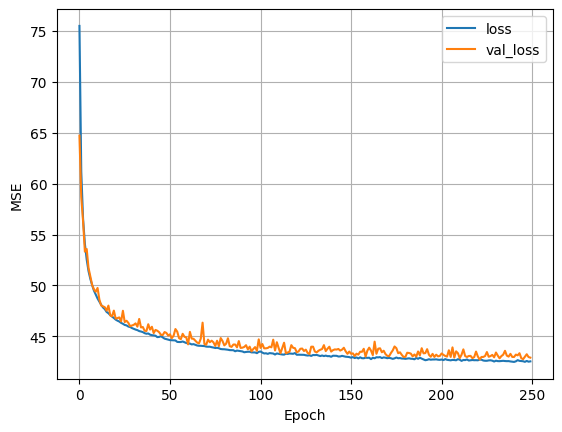

In [ ]:
plot_loss(history)

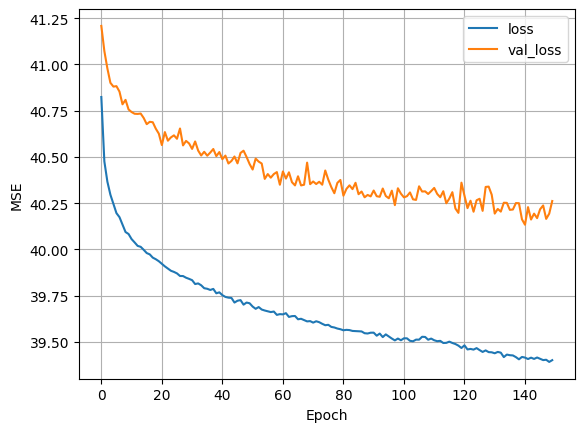

In [ ]:
plot_loss(history2)

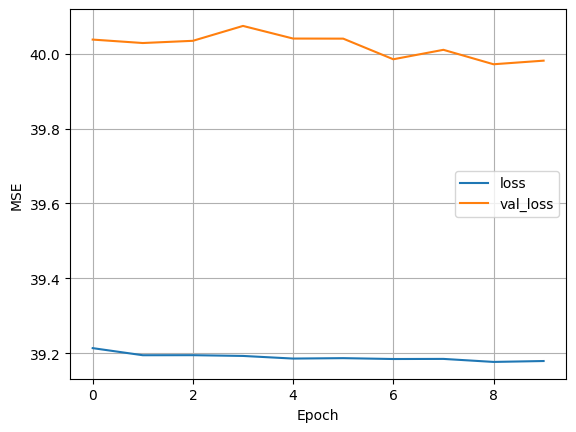

In [ ]:
plot_loss(history3)

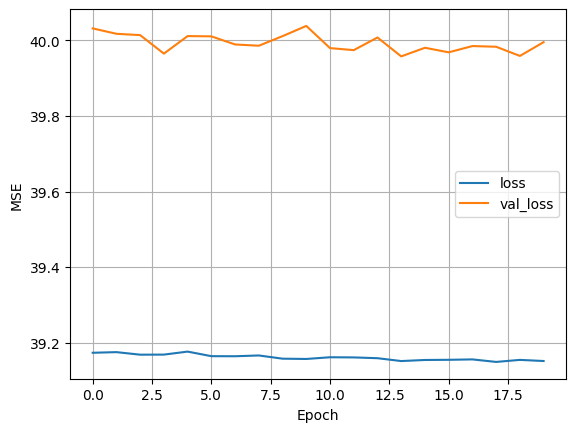

In [ ]:
plot_loss(history4)

In [ ]:
y_pred_nn = nn_model.predict(X_test_all)

10162/10162 [==============================] - 12s 1ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
def SMAPE(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
y_missing_all = nn_model.predict(X_missing_all)

12702/12702 [==============================] - 15s 1ms/step


In [ ]:
y_missing_all

array([[17.314283],
       [11.934198],
       [17.29945 ],
       ...,
       [10.882891],
       [15.166498],
       [11.739351]], dtype=float32)

In [ ]:
filled_df['montants_capteur'] = y_missing_all
filled_df['id'] = ids

In [ ]:
filled_df

,secteur,ligne,voyage,direction,periode_horaire,est_ferie,jour_semaine,categorie_jour,montants_capteur,id
1625820,2,8,33,0,3,0,0,1,17.314283,2103375
1625821,2,8,9,1,3,0,0,1,11.934198,2103376
1625822,2,8,34,0,3,0,0,1,17.299450,2103377
1625823,2,8,10,1,3,0,0,1,13.047684,2103378
1625824,2,8,11,1,2,0,0,1,4.433225,2103379
...,...,...,...,...,...,...,...,...,...,...
2032271,11,21,18,1,1,0,2,2,11.012312,2621166
2032272,11,21,30,1,1,0,2,2,15.029863,2621167
2032273,11,21,19,1,1,0,2,2,10.882891,2621168
2032274,11,21,31,1,1,0,2,2,15.166498,2621169


In [ ]:
print(r2_score(y_test_all, y_pred_nn))
print(MSE(y_pred_nn, y_test_all))
print(SMAPE(y_pred_nn, y_test_all))

0.6060670890394437
39.89404041580086
55.04378084030832


In [ ]:
filled_df.to_csv("out.csv")

In [ ]:
from google.colab import files
files.download("out.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>